# CMPT 898: Assigment 3 Solutions
## By Samuel Horovatin, sch923, 11185403

### 1. Baseline network: *You can start with a LeNet-5 style architecture that we discussed in the lecture. As a baseline start with ReLU activations for the hidden layers, and a softmax output layer.*

In [72]:
import tensorflow as tf
import numpy as np
import os, datetime
import math

# Hyper-parameters that remain constant throughout all questions
EPOCHS = 10
BATCH = 256
OPTIMIZER = 'adam'
LOSS = 'sparse_categorical_crossentropy'
METRICS = 'accuracy'

# Grab the Cifar10 dataset, which is a color image database consisiting of 
# 10 different classes representing airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Normalization of x_train and x_test and split into training dataset and testing dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

In [73]:
# Trains the model given the constant parameters and returns the model and the fit history
def train_model(model):
  model.compile(optimizer=OPTIMIZER,
                loss=LOSS,
                metrics=[METRICS])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  history = model.fit(x=x_train, 
                      y=y_train, 
                      epochs=EPOCHS,
                      batch_size=BATCH, 
                      validation_data=(x_test, y_test),
                      callbacks=[tensorboard_callback])
        
  return (model, history)

In [74]:
# LeNet-5 as described in the lecture notes
def create_baseline_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=6, 
        kernel_size=5, 
        activation='relu', 
        input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=5, 
        activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

train_model(create_baseline_model())

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 54us/sample - loss: 1.7701 - accuracy: 0.3529 - val_loss: 1.5578 - val_accuracy: 0.4281
Epoch 2/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.4742 - accuracy: 0.4665 - val_loss: 1.5029 - val_accuracy: 0.4544
Epoch 3/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.3823 - accuracy: 0.5047 - val_loss: 1.3852 - val_accuracy: 0.5029
Epoch 4/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.3055 - accuracy: 0.5346 - val_loss: 1.3086 - val_accuracy: 0.5297
Epoch 5/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.2520 - accuracy: 0.5561 - val_loss: 1.2621 - val_accuracy: 0.5486
Epoch 6/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.2082 - accuracy: 0.5724 - val_loss: 1.2399 - val_accuracy: 0.5591
Epoch 7/10
50000/50000 [==============================] 

(<tensorflow.python.keras.engine.sequential.Sequential at 0x1b1c183b588>,
 <tensorflow.python.keras.callbacks.History at 0x1aeba6b3408>)

### 2. Add L2 weight decay regularization: *Add an L2-norm penalty on the weights of your baseline model as regularization. Test two different regularization strengths.*

In [76]:
# A model that applies an regularization function at a specific strength at every layer
# Reused by both question 2 and 3
def create_regularized_model(regularizer, reg_strength):
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=6, 
        kernel_size=5, 
        activation='relu', 
        input_shape=(32, 32, 3), 
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=5, 
        activation='relu',
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        120,
        activation='relu',
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.Dense(
        84,
        activation='relu',
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.Dense(10,
        activation='softmax',
        kernel_regularizer=regularizer(reg_strength))])


In [77]:
LAMBDA1 = 0.001
LAMBDA2 = 0.01

print(f"Training model 1 with L2 regularization and a lambda of {LAMBDA1}")
train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA1))
print(f"Training model 2 with L2 regularization and a lambda of {LAMBDA2}")
train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA2))
%load_ext tensorboard
%tensorboard --logdir logs

Training model 1 with L2 regularization and a lambda of 0.001
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 51us/sample - loss: 2.0502 - accuracy: 0.3149 - val_loss: 1.8047 - val_accuracy: 0.3923
Epoch 2/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.6913 - accuracy: 0.4388 - val_loss: 1.6419 - val_accuracy: 0.4474
Epoch 3/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.5860 - accuracy: 0.4757 - val_loss: 1.5609 - val_accuracy: 0.4812
Epoch 4/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.5307 - accuracy: 0.4955 - val_loss: 1.5311 - val_accuracy: 0.4927
Epoch 5/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.4794 - accuracy: 0.5157 - val_loss: 1.4829 - val_accuracy: 0.5089
Epoch 6/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.4370 - accuracy: 0.5313 - val_loss: 1.4356 - val_accuracy: 0

Reusing TensorBoard on port 6006 (pid 22568), started 10:27:47 ago. (Use '!kill 22568' to kill it.)

### 3. Add L1 weight decay regularization: *Add an L1-norm penalty on the weights of your baseline model as regularization. Test two different regularization strengths.*

In [79]:
LAMBDA1 = 0.001
LAMBDA2 = 0.01

print(f"Training model 1 with L1 regularization and a lambda of {LAMBDA1}")
train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA1))
print(f"Training model 2 with L1 regularization and a lambda of {LAMBDA2}")
train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA2))

%load_ext tensorboard
%tensorboard --logdir logs

Training model 1 with L1 regularization and a lambda of 0.001
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 47us/sample - loss: 3.2408 - accuracy: 0.2441 - val_loss: 2.3018 - val_accuracy: 0.3134
Epoch 2/10
50000/50000 [==============================] - 2s 32us/sample - loss: 2.1789 - accuracy: 0.3456 - val_loss: 2.1123 - val_accuracy: 0.3618
Epoch 3/10
50000/50000 [==============================] - 2s 34us/sample - loss: 2.0272 - accuracy: 0.3926 - val_loss: 1.9754 - val_accuracy: 0.4079
Epoch 4/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.9500 - accuracy: 0.4129 - val_loss: 1.9466 - val_accuracy: 0.4009
Epoch 5/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.9014 - accuracy: 0.4233 - val_loss: 1.8904 - val_accuracy: 0.4324
Epoch 6/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.8675 - accuracy: 0.4322 - val_loss: 1.8484 - val_accuracy: 0

Launching TensorBoard...

### 4. Remove fully-connected layers: *Modify the architecture to remove the fully-connected layers at the backend of the network. For example, replace with Global Average Pooling or an alternative. Report the change in the number of parameters for this model compared to previous.*


In [80]:
#A model that applies an L1 regularization at every layer
def create_average_pooling_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=6, 
        kernel_size=5, 
        activation='relu', 
        input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=5, 
        activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D()])

print(f"Training model with Global Average Pooling")
train_model(create_average_pooling_model())

%load_ext tensorboard
%tensorboard --logdir logs

Training model with Global Average Pooling
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 45us/sample - loss: 2.2780 - accuracy: 0.1860 - val_loss: 2.0154 - val_accuracy: 0.2306
Epoch 2/10
50000/50000 [==============================] - 2s 31us/sample - loss: 1.9925 - accuracy: 0.2477 - val_loss: 1.9035 - val_accuracy: 0.2657
Epoch 3/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.8438 - accuracy: 0.3005 - val_loss: 1.8290 - val_accuracy: 0.3210
Epoch 4/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.8304 - accuracy: 0.3090 - val_loss: 1.8658 - val_accuracy: 0.2942
Epoch 5/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.8031 - accuracy: 0.3248 - val_loss: 1.7481 - val_accuracy: 0.3472
Epoch 6/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.7455 - accuracy: 0.3466 - val_loss: 1.7091 - val_accuracy: 0.3653
Epoch 7/10
50

Launching TensorBoard...

### 5. Analyze the accuracy of the different models: *For all six models, train/test your model three times to get a sense of the consistency of the test error. Keep other aspects of your model the same among designs (# epochs, mini-batch size, hyperparameters). Generate a table that summarizes the training error, test error, standard deviation of test error across three runs, inference time, and \# of parameters for each model.*

In [89]:
# Training for 6 models of 10 epochs each takes a long time, so actual tabulation is done in another code block

# Chosen based on performance of the above model test for L1 and L2
LAMBDA1 = 0.001
LAMBDA2 = 0.01

model_results = {"baseline":list(),"l2_lambda1":list(),"l1_lambda1":list(),"l2_lambda2":list(),"l1_lambda2":list(),"global_average_pooling":list()}

for i in range(3):
    # Train and store the baseline model results
    print("BASELINE Model Training: ...")
    model_results["baseline"].append(train_model(create_baseline_model()))

    # Train and store the L2 model results with both LAMBDA values
    print("L2 Model Training: ...")
    model_results["l2_lambda1"].append(train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA1)))
    model_results["l2_lambda2"].append(train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA2)))

    # Train and store the L1 model results with both LAMBDA values
    print("L1 Model Training: ...")
    model_results["l1_lambda1"].append(train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA1)))
    model_results["l1_lambda2"].append(train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA2)))

    # Train and store the global_average_pooling model results
    print("Global Average Pooling Model Training: ...")
    model_results["global_average_pooling"].append(train_model(create_average_pooling_model()))

accuracy: 0.2150
Epoch 4/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.9939 - accuracy: 0.2491 - val_loss: 1.9194 - val_accuracy: 0.2743
Epoch 5/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.9207 - accuracy: 0.2803 - val_loss: 1.8944 - val_accuracy: 0.3002
Epoch 6/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.8836 - accuracy: 0.2998 - val_loss: 1.9789 - val_accuracy: 0.2335
Epoch 7/10
50000/50000 [==============================] - 2s 33us/sample - loss: 1.8645 - accuracy: 0.3025 - val_loss: 1.8254 - val_accuracy: 0.3255
Epoch 8/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.8380 - accuracy: 0.3147 - val_loss: 1.8573 - val_accuracy: 0.2998
Epoch 9/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.8104 - accuracy: 0.3260 - val_loss: 1.7851 - val_accuracy: 0.3434
Epoch 10/10
50000/50000 [==============================] - 2s 31us/sample - loss: 1.7930 

Starting table creation...
Currently populating row for [baseline]...
[0.5849999785423279]
[0.5849999785423279, 0.585099995136261]
[0.5849999785423279, 0.585099995136261, 0.5928999781608582]
Currently populating row for [l2_lambda1]...
[0.5566999912261963]
[0.5566999912261963, 0.5551999807357788]
[0.5566999912261963, 0.5551999807357788, 0.5717999935150146]
Currently populating row for [l1_lambda1]...
[0.45100000500679016]
[0.45100000500679016, 0.46160000562667847]
[0.45100000500679016, 0.46160000562667847, 0.4790000021457672]
Currently populating row for [l2_lambda2]...
[0.4392000138759613]
[0.4392000138759613, 0.43849998712539673]
[0.4392000138759613, 0.43849998712539673, 0.4465000033378601]
Currently populating row for [l1_lambda2]...
[0.10000000149011612]
[0.10000000149011612, 0.10000000149011612]
[0.10000000149011612, 0.10000000149011612, 0.10000000149011612]
Currently populating row for [global_average_pooling]...
[0.3418000042438507]
[0.3418000042438507, 0.10000000149011612]
[0.3

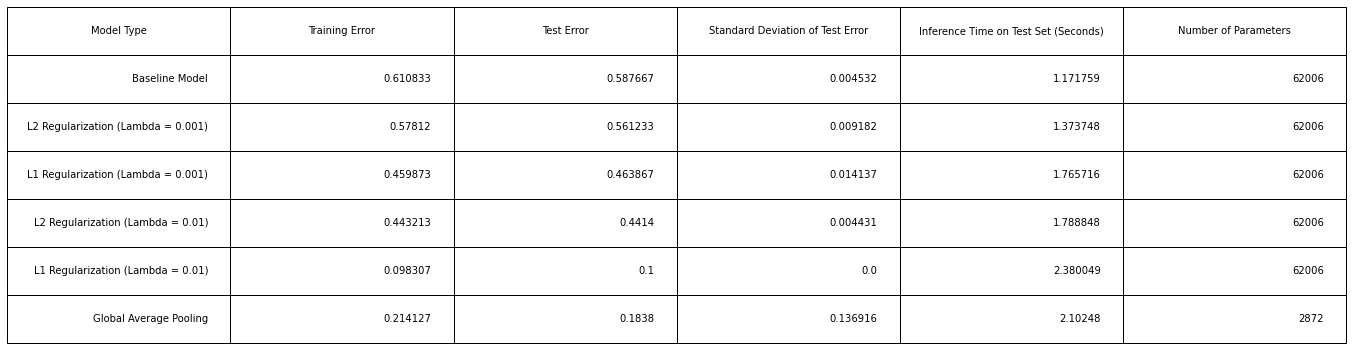

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

# Data assembly
table_label = ("Model Type", "Training Error", "Test Error", "Standard Deviation of Test Error", "Inference Time on Test Set (Seconds)", "Number of Parameters")
table_rows = list()

print("Starting table creation...")
for (key, model_list) in model_results.items():
    row_data = {"training_error" : list(), "test_error" : list(), "inference_time" : list()}

    print(f"Currently populating row for [{key}]...")
    # Gets training accuracy and test accuracy
    for (model, hist) in model_list:
        row_data["training_error"].append(float(hist.history['accuracy'][EPOCHS-1]))
        row_data["test_error"].append(float(hist.history['val_accuracy'][EPOCHS-1]))
        row_data["inference_time"].append(float(model.evaluate(x_test, y_test, verbose=0)[0]))

    # Completely for aesthetic purposes
    nice_keys = {"baseline": "Baseline Model","l2_lambda1": f"L2 Regularization (Lambda = {LAMBDA1})","l1_lambda1":f"L1 Regularization (Lambda = {LAMBDA1})","l2_lambda2": f"L2 Regularization (Lambda = {LAMBDA2})","l1_lambda2": f"L1 Regularization (Lambda = {LAMBDA2})","global_average_pooling": f"Global Average Pooling"}

    # Adds all values to row for table creation 
    table_rows.append((nice_keys[key], 
    round(stat.mean(row_data["training_error"]), 6), 
    round(stat.mean(row_data["test_error"]), 6), 
    round(stat.stdev(row_data["test_error"]), 6), 
    round(stat.mean(row_data["inference_time"]), 6), 
    int(model_results[key][0][0].count_params())
    ))
   
# Create table
fig, axes = plt.subplots()

# Hides unneeded axes
fig.patch.set_visible(False)
axes.axis('off')
axes.axis('tight')

table_df = pd.DataFrame(table_rows, columns=table_label)
 
# Plot table with some formatting
table = axes.table(cellText=table_df.values, colLabels=table_df.columns, loc='center')
table.scale(4,4)
plt.show()


### 6. Analyze the weights of the regularized models: *For the baseline model and the four regularized models (from parts 2 and 3: L2 and L1 regularization with two different strengths each) measure the sparsity of the weights in each FC layer and create a bar chart that compares the sparsity between the models in each layer. There are a number of metrics that measure sparsity, e.g. Hoyer's index. For different sparsity metrics, see Table I in https://arxiv.org/abs/0811.4706*

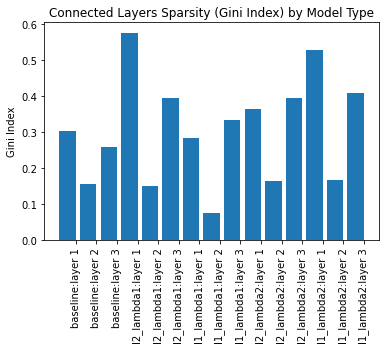

In [134]:
# Gini Index as described in https://github.com/oliviaguest/gini/blob/master/gini.py. Expects a tf.Variable of weights as input
def gini_index(weight_vect):
    flat_weight = tf.keras.backend.flatten(weight_vect).numpy()

    # Remove negative values
    if np.amin(flat_weight) < 0:
        flat_weight -= np.amin(flat_weight)

    # Gini index cannot work with values of 0
    flat_weight += 0.0000001

    sorted_weight = np.sort(flat_weight)
    N = len(sorted_weight)
    i = np.arange(1, N+1)
    
    return ((np.sum((2 * i - N - 1) * sorted_weight)) / (N * np.sum(sorted_weight))) 

# This max depth will be the same for all models
max_connected_depth = len(model_results[key][0][0].weights)

# Min depth is found using magic number 3. This comes from the number of fully connected layers at the end of each network
min_connected_depth = max_connected_depth - 3

plt_labels = list()
plt_vals = list()

# Collects values for figure, skipping global average pooling
for key, model_tuple in model_results.items():
    model = model_tuple[0][0]
    if key == 'global_average_pooling':
        continue
    for i in range(min_connected_depth, max_connected_depth):
        plt_labels.append(f"{key}:layer {i}")
        plt_vals.append(gini_index(model.weights[i]))

plt.figure()
barwidth= 0.8
plt.bar(np.arange(len(plt_vals)),plt_vals, barwidth)
plt.gca().set_xticks(np.arange(len(plt_vals))+barwidth/2.)
plt.gca().set_xticklabels(plt_labels)
plt.xticks(rotation='vertical')
plt.gca().set(title='Connected Layers Sparsity (Gini Index) by Model Type', ylabel='Gini Index')
plt.show()